# Computer Vision 1: Assignment 1

Task 2

Group Number 43

Marek Drwal

## setup

In [127]:
import imageio
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

## read

In [128]:
img_pth = 'visual_attention_ds.png'

In [129]:
img = ski.io.imread(img_pth)

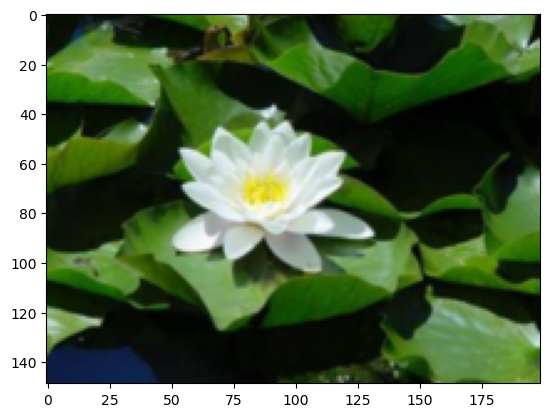

In [130]:
plt.imshow(img)

## convert

In [131]:
img = ski.color.rgba2rgb(img)

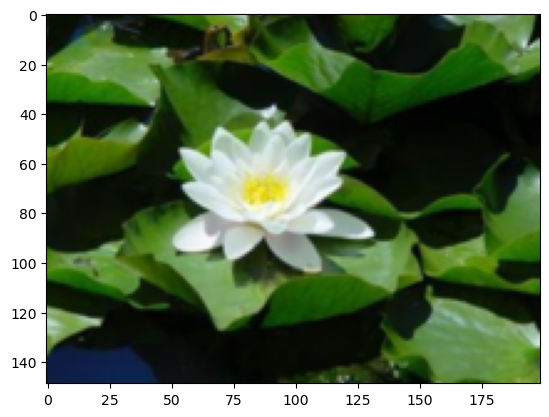

In [132]:
plt.imshow(img)

In [133]:
img = ski.color.rgb2gray(img)

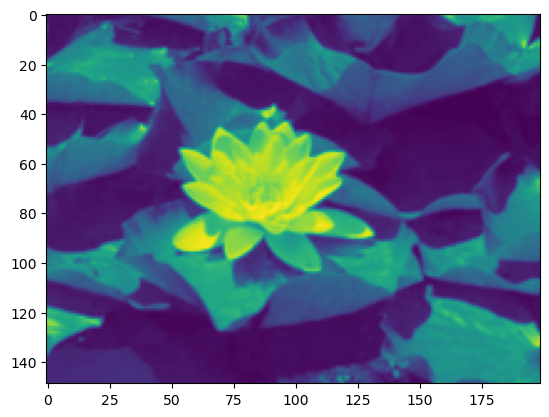

In [134]:
plt.imshow(img)

## conv 2

In [135]:
img = ski.io.imread(img_pth)

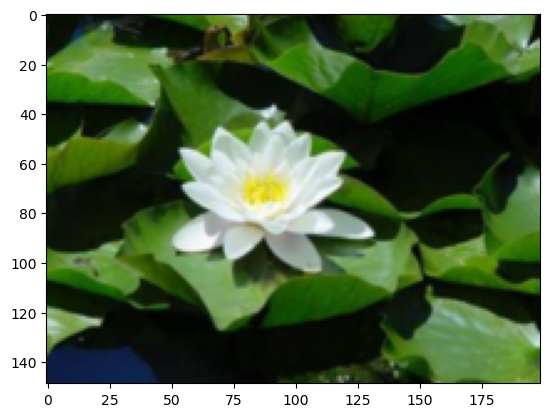

In [136]:
plt.imshow(img)

In [137]:
img2 = ski.color.rgba2rgb(img)

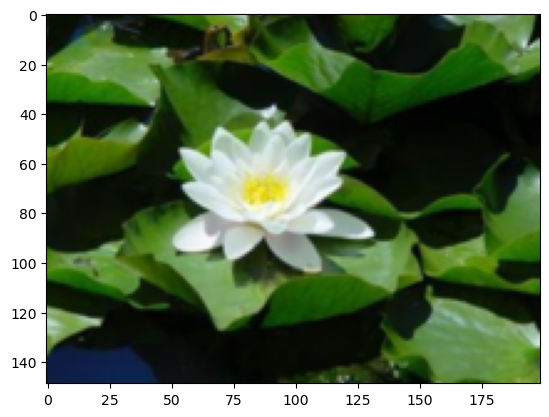

In [138]:
plt.imshow(img2)

In [139]:
img3 = ski.color.rgb2gray(img2)

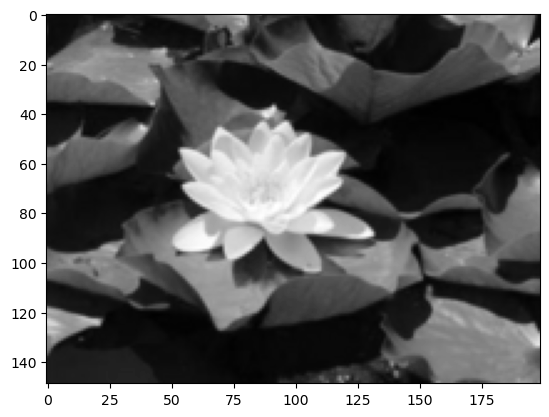

In [140]:
plt.imshow(img3, cmap=plt.cm.gray)

## integral img

In [141]:
ii = ski.transform.integral_image(img3)
ii

array([[1.07000000e-01, 1.65839216e-01, 2.21612157e-01, ...,
        5.68624933e+01, 5.70552933e+01, 5.70956557e+01],
       [2.00836471e-01, 3.22436471e-01, 4.38186667e-01, ...,
        1.09715171e+02, 1.10063788e+02, 1.10153472e+02],
       [2.80973725e-01, 4.55541961e-01, 6.22310196e-01, ...,
        1.59156518e+02, 1.59620038e+02, 1.59749511e+02],
       ...,
       [3.74655329e+01, 7.37578059e+01, 1.09155577e+02, ...,
        8.29938292e+03, 8.34052819e+03, 8.38045299e+03],
       [3.75783361e+01, 7.39873565e+01, 1.09502143e+02, ...,
        8.33716463e+03, 8.37879730e+03, 8.41921088e+03],
       [3.76880133e+01, 7.42100969e+01, 1.09842174e+02, ...,
        8.37276935e+03, 8.41487541e+03, 8.45581919e+03]])

In [142]:
ii.shape

(149, 199)

In [143]:
img3.shape

(149, 199)

In [144]:
c_size = 3
s_size = 7

In [145]:
s = np.zeros_like(img3)
c = np.zeros_like(img3)

In [146]:
s = c = 0

In [147]:
sc_img = np.zeros_like(img3)

In [148]:
y_dim, x_dim = img3.shape

In [149]:
for y in range(y_dim):
    for x in range(x_dim):
        st = (max(y-s_size, 0), max(x-s_size, 0))
        en = (min(y+s_size, y_dim-1), min(x+s_size, x_dim-1))
        s = ski.transform.integrate(ii, st, en)[0]
        
        st = (max(y-c_size, 0), max(x-c_size, 0))
        en = (min(y+c_size, y_dim-1), min(x+c_size, x_dim-1))
        c = ski.transform.integrate(ii, st, en)[0]

        sc_img[y][x] = s-c
        

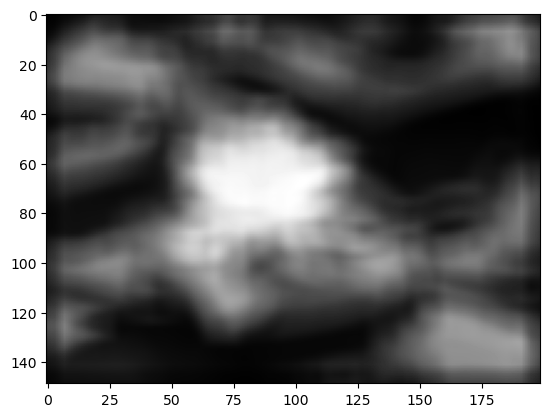

In [150]:
plt.imshow(sc_img, cmap=plt.cm.gray)

## integration 2

In [151]:
sc_img = np.zeros_like(img3)

In [152]:
for y in range(y_dim):
    for x in range(x_dim):
        if x-s_size >= 0 and x+s_size < x_dim and y-s_size >= 0 and y+s_size < y_dim:
            st = (y-s_size, x-s_size)
            en = (y+s_size, x+s_size)
            s = ski.transform.integrate(ii, st, en)[0]

            st = (y-c_size, x-c_size)
            en = (y+c_size, x+c_size)
            c = ski.transform.integrate(ii, st, en)[0]

            sc_img[y][x] = s-c
        # else:
        #     sc_img[y][x] = img3[y][x]
        

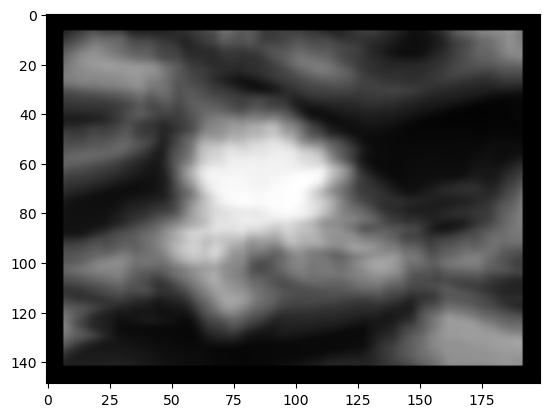

In [153]:
plt.imshow(sc_img, cmap=plt.cm.gray)

## integration 3

In [154]:
sc_img = np.zeros_like(img3)

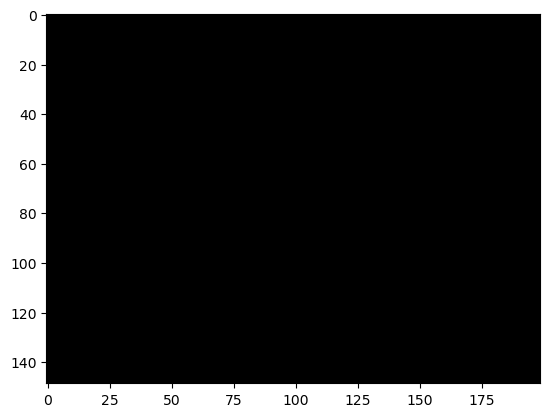

In [155]:
plt.imshow(sc_img, cmap=plt.cm.gray)

## int4

In [156]:
ii = ski.transform.integral_image(img3)
ii

array([[1.07000000e-01, 1.65839216e-01, 2.21612157e-01, ...,
        5.68624933e+01, 5.70552933e+01, 5.70956557e+01],
       [2.00836471e-01, 3.22436471e-01, 4.38186667e-01, ...,
        1.09715171e+02, 1.10063788e+02, 1.10153472e+02],
       [2.80973725e-01, 4.55541961e-01, 6.22310196e-01, ...,
        1.59156518e+02, 1.59620038e+02, 1.59749511e+02],
       ...,
       [3.74655329e+01, 7.37578059e+01, 1.09155577e+02, ...,
        8.29938292e+03, 8.34052819e+03, 8.38045299e+03],
       [3.75783361e+01, 7.39873565e+01, 1.09502143e+02, ...,
        8.33716463e+03, 8.37879730e+03, 8.41921088e+03],
       [3.76880133e+01, 7.42100969e+01, 1.09842174e+02, ...,
        8.37276935e+03, 8.41487541e+03, 8.45581919e+03]])

In [157]:
ii.shape

(149, 199)

In [158]:
img3.shape

(149, 199)

In [159]:
c_size = 3
s_size = 7

In [160]:
s = np.zeros_like(img3)
c = np.zeros_like(img3)

In [161]:
s = c = 0

In [162]:
sc_img = np.zeros_like(img3)

In [163]:
y_dim, x_dim = img3.shape

In [164]:
for y in range(y_dim):
    for x in range(x_dim):
        st = (max(y-s_size-1, 0), max(x-s_size-1, 0))
        en = (min(y+s_size+1, y_dim-1), min(x+s_size+1, x_dim-1))
        s = ski.transform.integrate(ii, st, en)[0]
        
        st = (max(y-c_size-1, 0), max(x-c_size-1, 0))
        en = (min(y+c_size+1, y_dim-1), min(x+c_size+1, x_dim-1))
        c = ski.transform.integrate(ii, st, en)[0]

        sc_img[y][x] = s-c
        

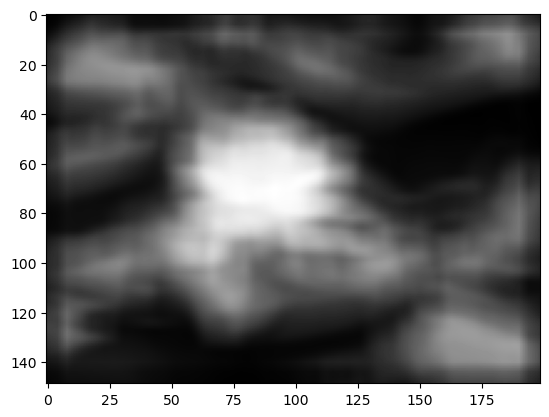

In [165]:
plt.imshow(sc_img, cmap=plt.cm.gray)

## int5

In [166]:
c_size = 3-1
s_size = 7-1

In [167]:
sc_img = np.zeros_like(img3)

In [168]:
for y in range(y_dim):
    for x in range(x_dim):
        if x-s_size >= 0 and x+s_size < x_dim and y-s_size >= 0 and y+s_size < y_dim:
            st = (y-s_size, x-s_size)
            en = (y+s_size, x+s_size)
            s = ski.transform.integrate(ii, st, en)[0]

            st = (y-c_size, x-c_size)
            en = (y+c_size, x+c_size)
            c = ski.transform.integrate(ii, st, en)[0]

            sc_img[y][x] = s-c
        # else:
        #     sc_img[y][x] = img3[y][x]
        

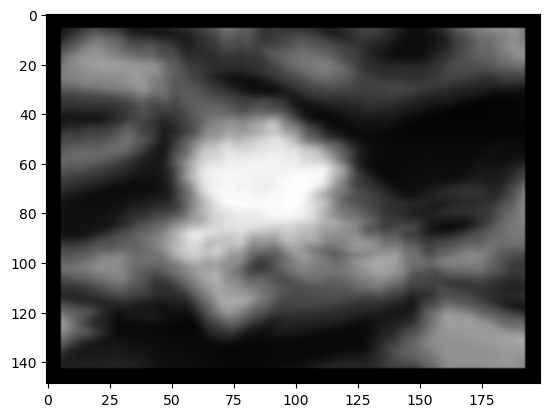

In [169]:
plt.imshow(sc_img, cmap=plt.cm.gray)